## Fase 4: Estrategia de cobertura como control (Hedging como ley de control)

La cobertura dinámica se interpreta como un **feedback proporcional** donde la señal de control

$u(t)=\Delta(t)=\frac{\partial V}{\partial S}(S(t),t)$

ajusta la posición en el subyacente para anular el término estocástico $\sigma S\,dB(t)$ en el portafolio replicante:

$\Pi(t)=-V(S(t),t)+\Delta(t)\,S(t).$

Al aplicar la fórmula de Itô y sustituir $\Delta=V_S$, se comprueba que $d\Pi= r\Pi\,dt$ y se recupera la PDE de Black–Scholes.

---

## 1. Interpretación de la retroalimentación como ley de control

1. **Dinámica del subyacente**:
   $dS(t)=\mu S(t)\,dt + \sigma S(t)\,dB(t).$
2. **Portafolio replicante**:
   $\Pi(t)=-V(S,t)+\Delta(t)S(t),\quad \Delta(t)=V_S(S(t),t).$
3. **Anulación del ruido**: si $\Delta=V_S$, el coeficiente de $dB(t)$ en $d\Pi$ se anula, dejando solo el término determinista.

En lenguaje de control, $S(t)$ es la **variable de estado**, $V(S,t)$ el **output**, y $\Delta$ la ley de control proporcional.

---

## 2. Linearización alrededor de un punto de operación $(S_0,V_0)$

Para estudiar las **pequeñas variaciones** alrededor de un equilibrio, definimos:
$
S(t)=S_0+\delta S(t),
\quad V(S(t),t)=V_0+\delta V(t).
$

### 2.1 Punto de equilibrio

- En el instante $t_0$, asumimos $S(t_0)=S_0$ y $V(S_0,t_0)=V_0$ satisface la Black–Scholes estática.
- En ese punto, las derivadas parciales en equilibrio cumplen:
  $V_t|_{(S_0,t_0)}=0,\quad V_S|_{(S_0,t_0)}=\Delta_0,\quad V_{SS}|_{(S_0,t_0)}=\beta_0,\quad V_{SSS}|_{(S_0,t_0)}=\gamma_0.$

### 2.2 Expansión en series de Taylor (orden lineal)

1. **Término $V_t$**:
   $
   V_t(S,t)
   =V_t|_{(S_0,t_0)}+\frac{d}{dt}(\delta V)+\cdots
   \approx \dot{\delta V},
   $
   pues $V_t|_{(S_0,t_0)}=0$.

2. **Término $\tfrac12\sigma^2 S^2V_{SS}$**:
   $
   \tfrac12\sigma^2S(t)^2V_{SS}(S(t),t)
   =\tfrac12\sigma^2(S_0+\delta S)^2[\beta_0+\gamma_0\,\delta S+\cdots]
   \approx \tfrac12\sigma^2\bigl(S_0^2\beta_0+2S_0\beta_0\,\delta S+S_0^2\gamma_0\,\delta S\bigr).
   $
   - El término constante $\tfrac12\sigma^2S_0^2\beta_0$ está en equilibrio.
   - El coeficiente de $\delta S$ es

$$
A_1 = \frac{1}{2}\,\sigma^2\bigl(2S_0\beta_0 + S_0^2\gamma_0\bigr)
$$



3. **Término $\mu S\,V_S$**:
   $
   \mu S(t)V_S(S(t),t)
   =\mu(S_0+\delta S)(\Delta_0+\beta_0\,\delta S+\cdots)
   \approx \mu S_0\Delta_0+\mu(\Delta_0+S_0\beta_0)\,\delta S.
   $
   - Constante $\mu S_0\Delta_0$ en equilibrio.
   - Coeficiente $\delta S$:
$$
A_2 = \mu\bigl(\Delta_0 + S_0\beta_0\bigr)
$$

4. **Término $-rV$**:
   $
   -rV(S,t)=-r(V_0+\delta V) \approx -r\,\delta V.
   $

5. **Ecuación linealizada**:
   Reuniendo los términos lineales:
   $
   \dot{\delta V} +r\,\delta V + (A_1+A_2)\,\delta S=0
   \quad\Longleftrightarrow\quad
   \dot{\delta V}=-r\,\delta V-K\,\delta S,
   $
   donde definimos
   $K:=A_1+A_2.
   $

---

## 3. Transformada de Laplace y función de transferencia

Tomamos la transformada $\mathcal L\{\delta V\}=\delta V(s)$, $\mathcal L\{\delta S\}=\delta S(s)$; condiciones iniciales nulas. Entonces

$(s+r)\,\delta V(s)=-K\,\delta S(s)
\quad\Longrightarrow\quad
G(s):=\frac{\delta V(s)}{\delta S(s)}=-\frac{K}{s+r}.
$

In [2]:
!pip install control numpy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 7.3 MB/s eta 0:00:00


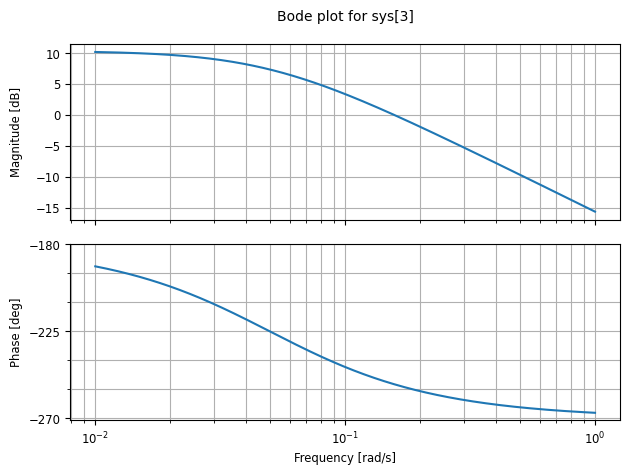

In [3]:
import control as ctrl
# Parámetros de ejemplo
r_val = 0.05
# Sustituye Delta0, beta0, gamma0 y S0 por valores reales para calcular A1,A2,K
S0, sigma, mu = 100, 0.2, 0.07
beta0, gamma0, Delta0 = 0.01, 0.0001, 0.5
A1 = 0.5*sigma**2*(2*S0*beta0 + S0**2*gamma0)
A2 = mu*(Delta0 + S0*beta0)
K = A1 + A2
s = ctrl.TransferFunction.s
G = -K/(s + r_val)

# Diagrama de Bode
graph = ctrl.bode_plot(G, dB=True)

### Comentario de la respuesta en frecuencia

- **Pole** en $s=-r$ (estable, constante de tiempo $1/r$).
- **Ganancia DC**: $|G(0)|=|K/r|$.
- A bajas $\omega$, $|G(j\omega)|\approx|K/r|$; a altas, decae $\mathcal O(1/\omega)$.

---

**Conclusión:** la retroalimentación delta convierte el lazo de hedging en un **sistema de primer orden estable**, con polo en $-r$ y ganancia estática $|K/r|$.